In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler 

In [ ]:
col=['ind','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
df = pd.read_csv("trainKNN.txt",delimiter=',',index_col=None)
print("dataset loaded")
df.columns=col
df.drop(df.columns[0], axis=1, inplace=True)

dataset loaded


In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      195 non-null    float64
 1   Na      195 non-null    float64
 2   Mg      195 non-null    float64
 3   Al      195 non-null    float64
 4   Si      195 non-null    float64
 5   K       195 non-null    float64
 6   Ca      195 non-null    float64
 7   Ba      195 non-null    float64
 8   Fe      195 non-null    float64
 9   Type    195 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.4 KB


In [ ]:
df.shape

(195, 10)

In [ ]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Length: 195, dtype: bool

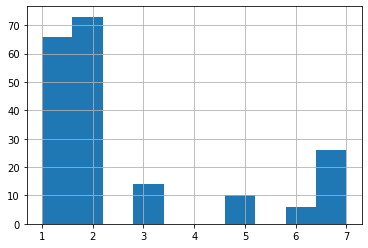

In [ ]:
df['Type'].hist()
plt.show()

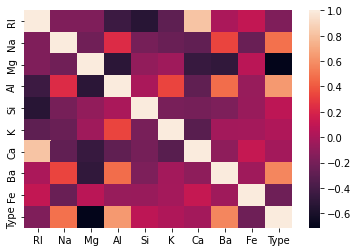

In [ ]:
tc = df.corr()
sns.heatmap(tc)
plt.show()


<Figure size 576x576 with 0 Axes>

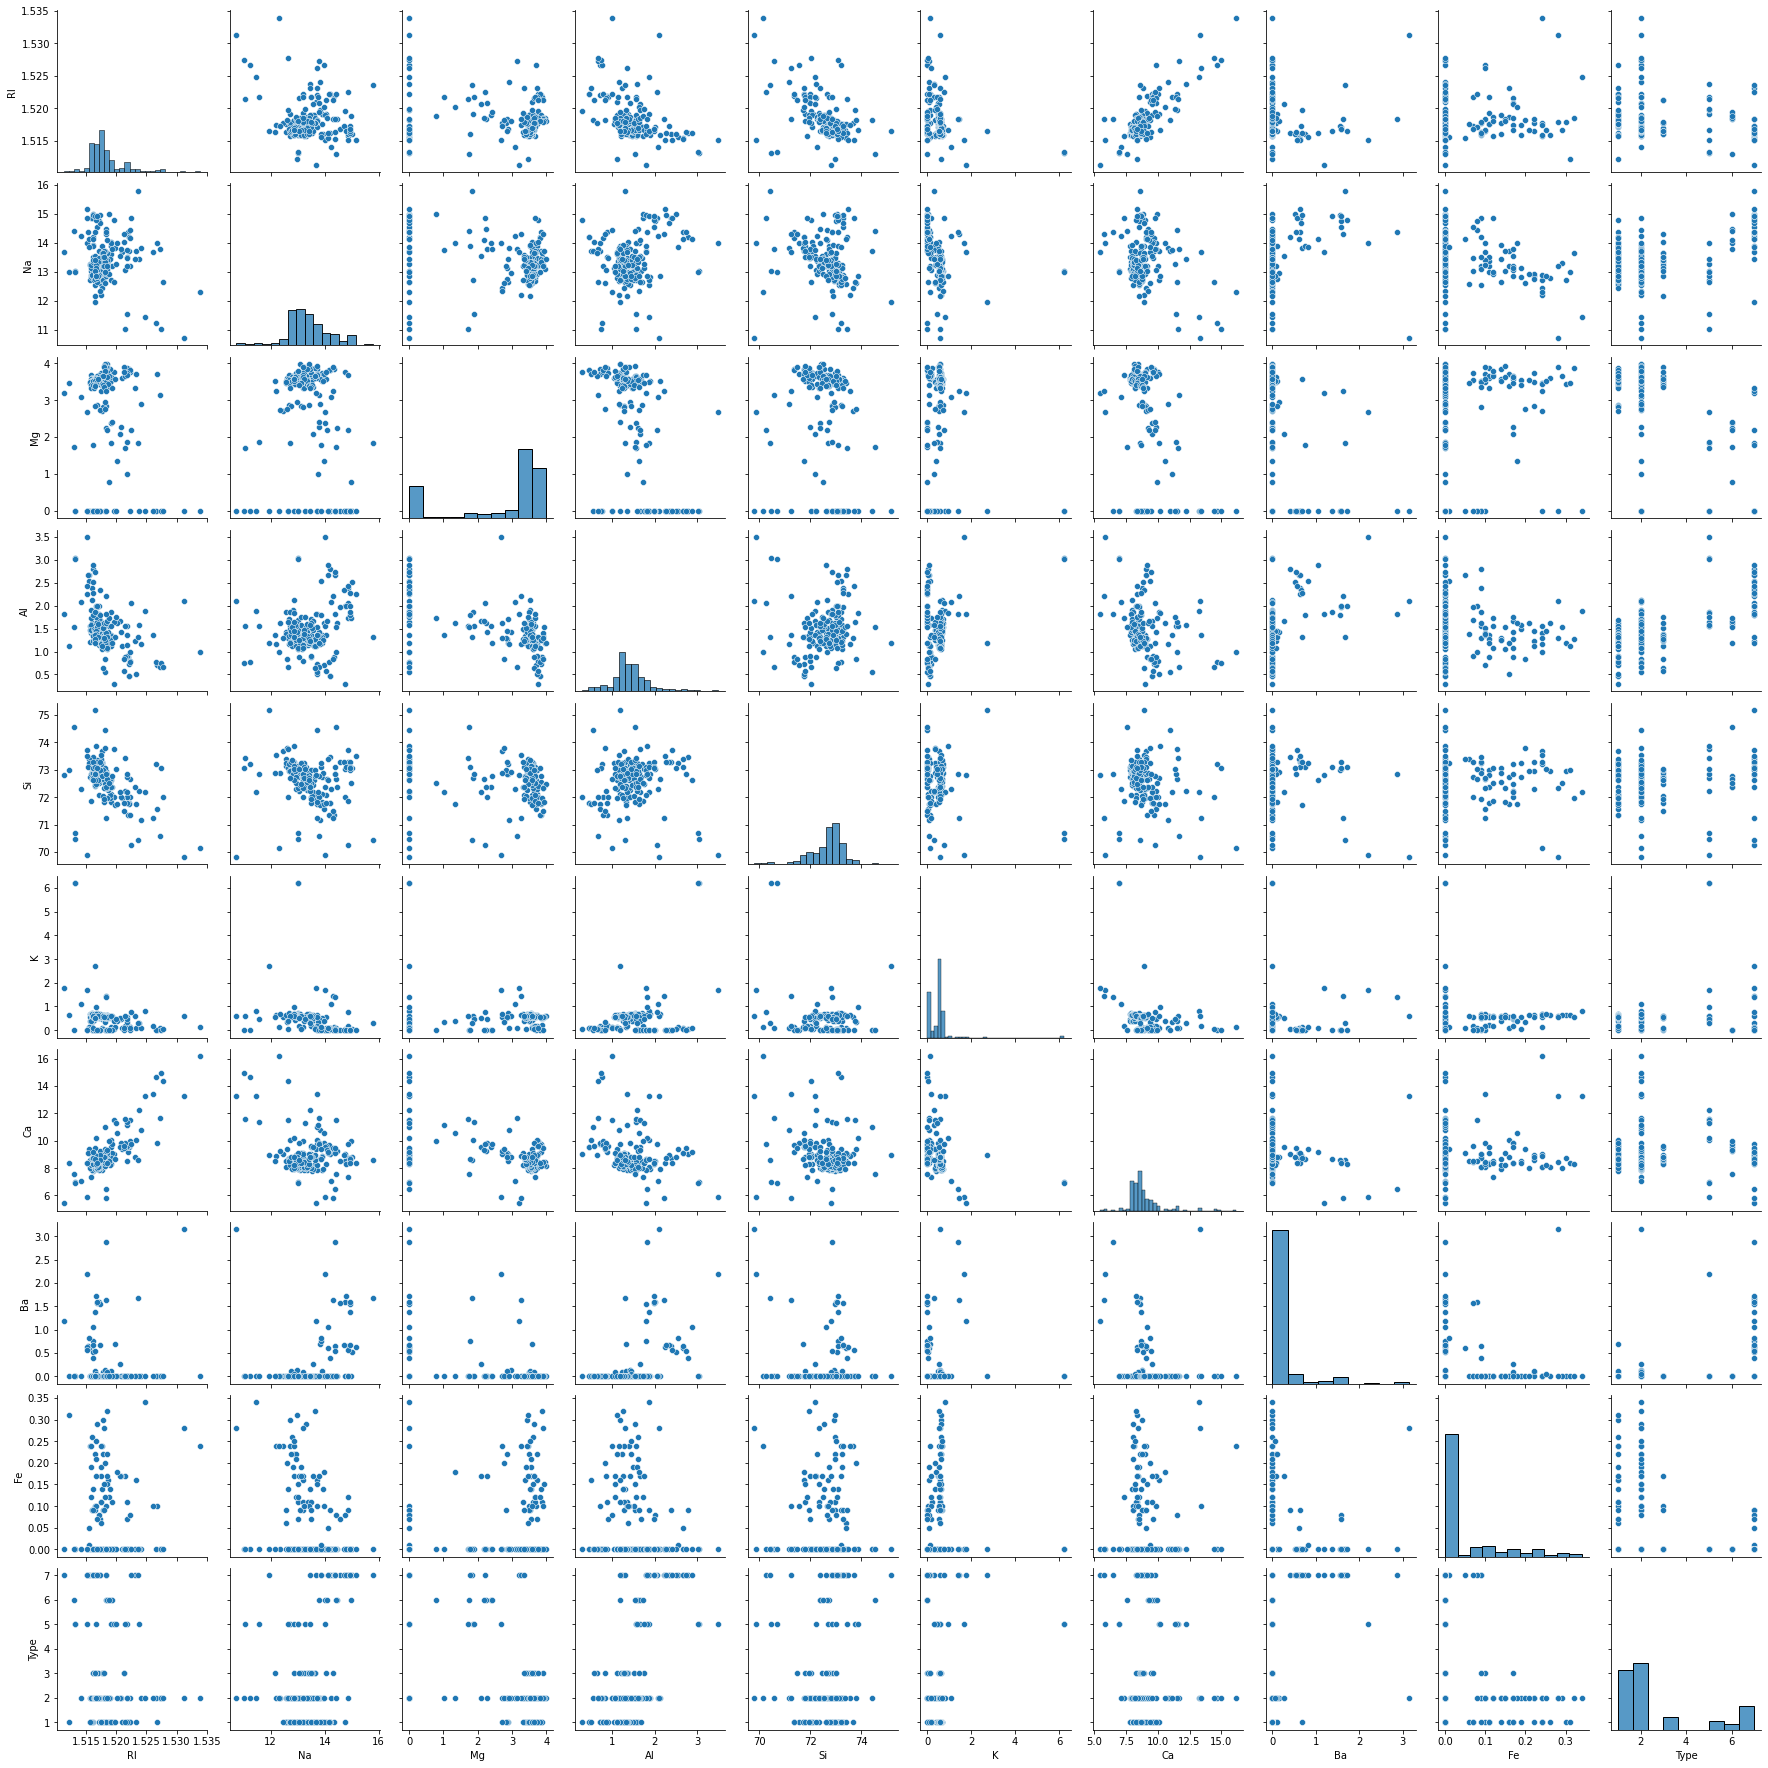

In [ ]:
cols=df.columns
plt.figure(figsize=(8,8))
sns.pairplot(df[cols],palette='coolwarm');
plt.show()

Text(0.5, 1.0, 'Fe Interval and Counts')

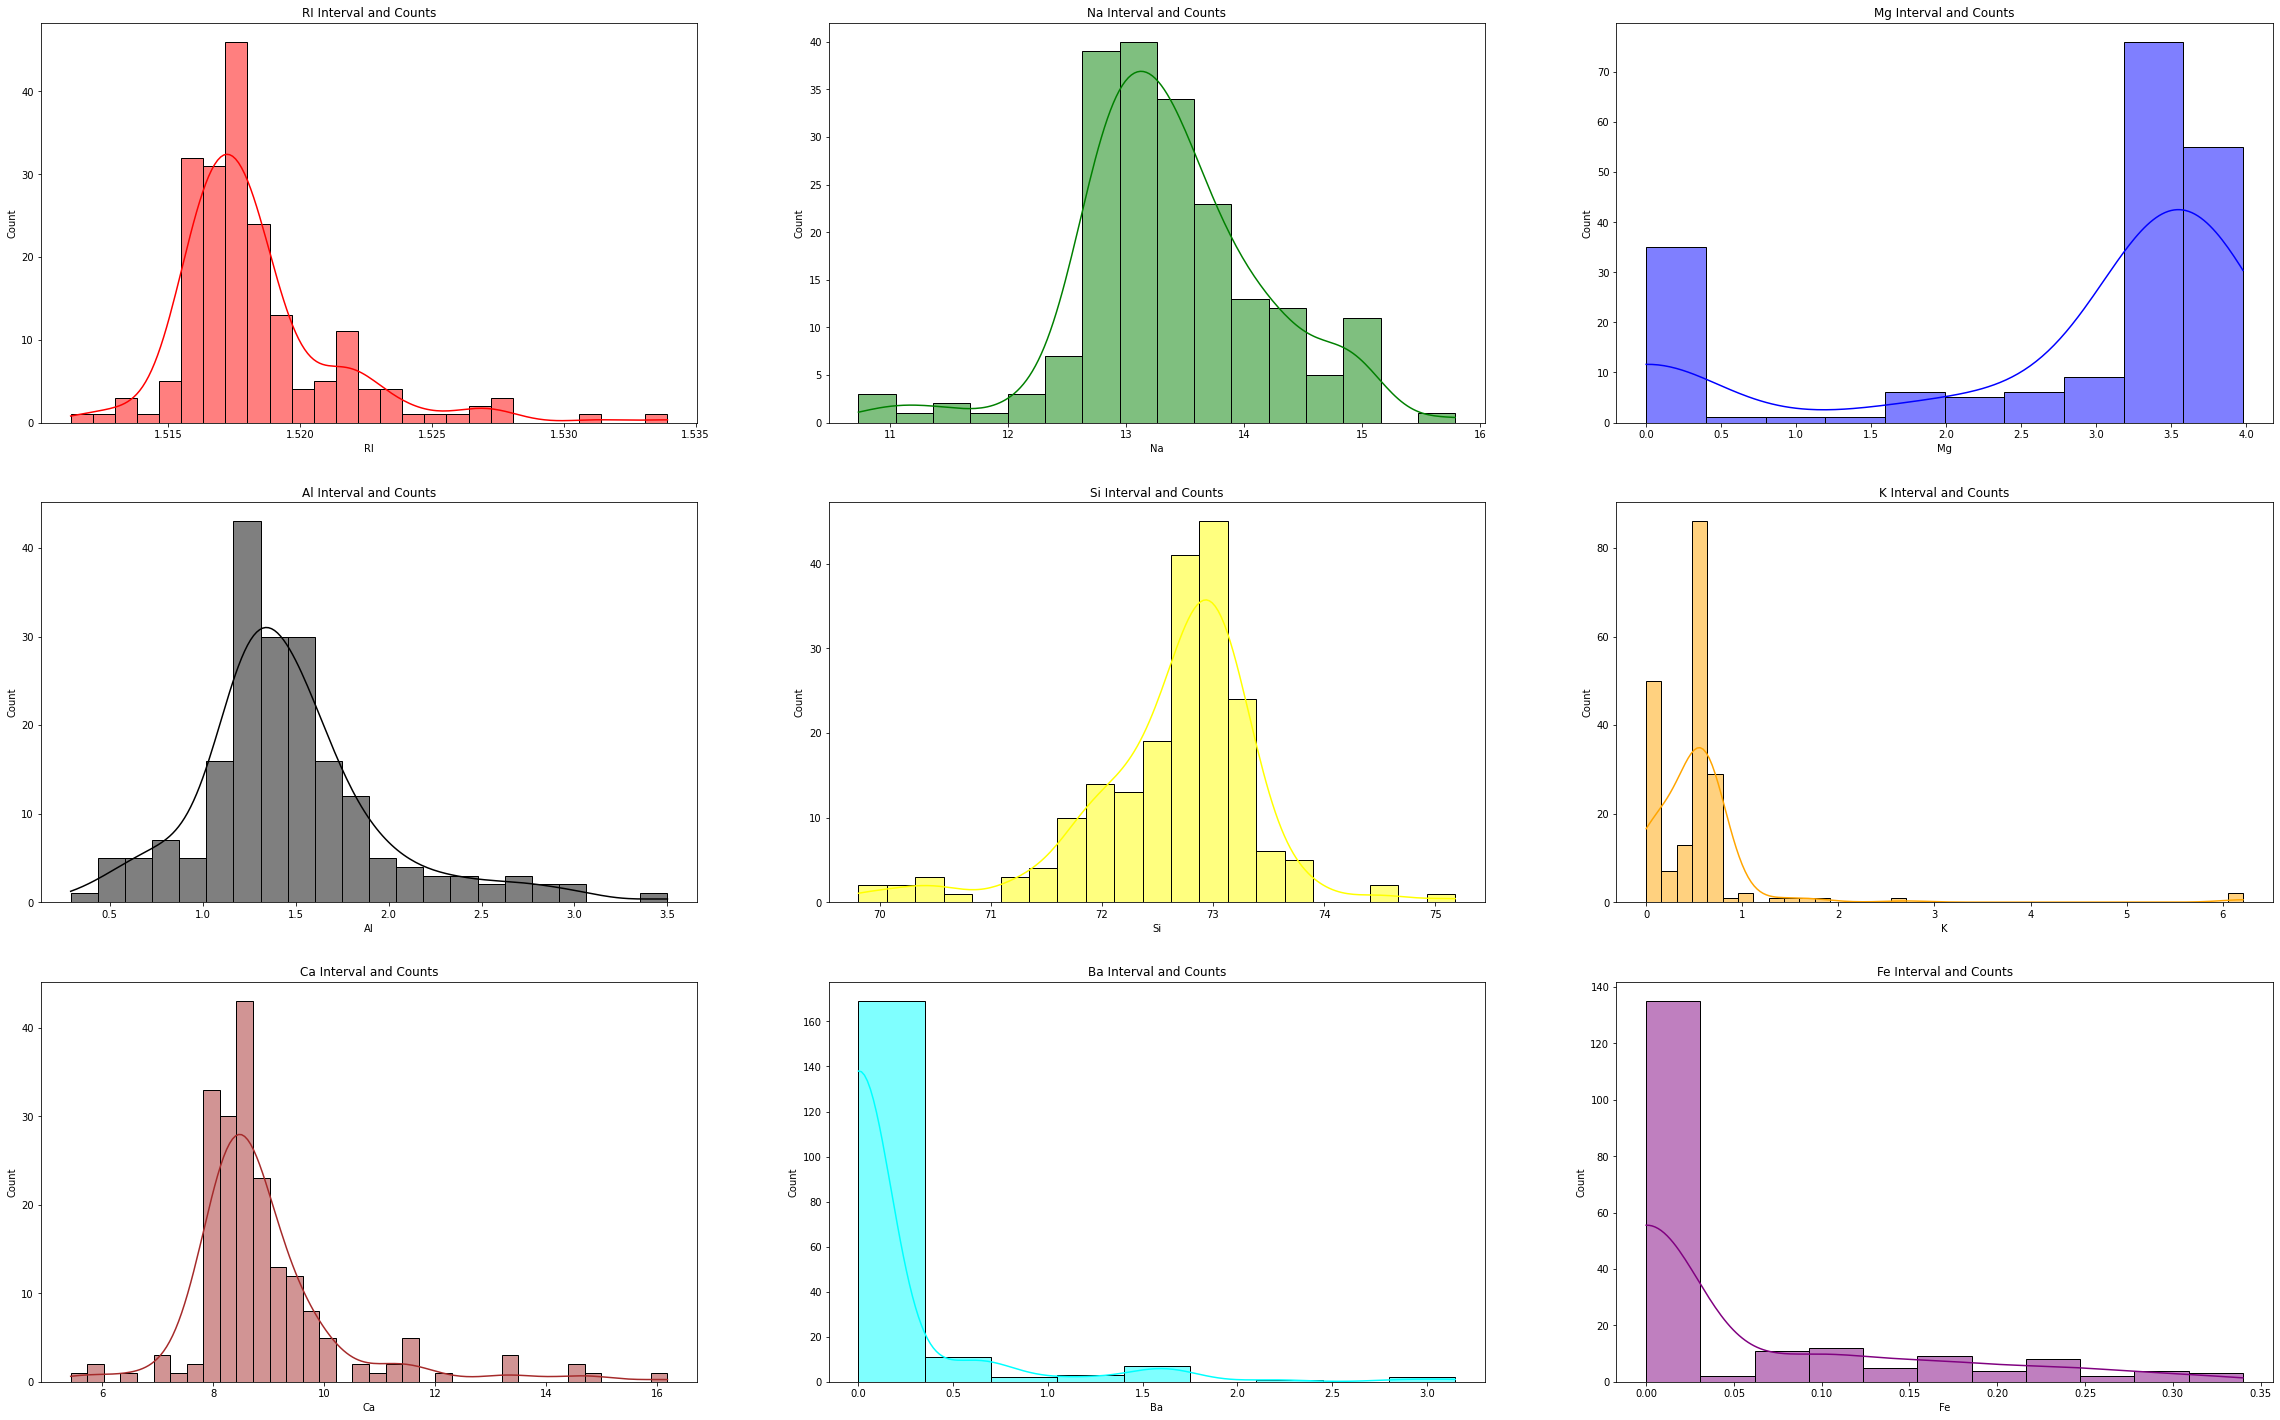

In [ ]:
plt.figure(figsize=(40,25))

plt.subplot(3,3,1)
sns.histplot(df['RI'], color = 'red', kde = True).set_title('RI Interval and Counts')

plt.subplot(3,3,2)
sns.histplot(df['Na'], color = 'green', kde = True).set_title('Na Interval and Counts')

plt.subplot(3,3,3)
sns.histplot(df['Mg'], kde = True, color = 'blue').set_title('Mg Interval and Counts')

plt.subplot(3,3,4)
sns.histplot(df['Al'], kde = True, color = 'black').set_title('Al Interval and Counts')

plt.subplot(3,3,5)
sns.histplot(df['Si'], kde = True, color = 'yellow').set_title('Si Interval and Counts')

plt.subplot(3,3,6)
sns.histplot(df['K'], kde = True, color = 'orange').set_title('K Interval and Counts')

plt.subplot(3,3,7)
sns.histplot(df['Ca'], kde = True, color = 'brown').set_title('Ca Interval and Counts')

plt.subplot(3,3,8)
sns.histplot(df['Ba'], kde = True, color = 'cyan').set_title('Ba Interval and Counts')

plt.subplot(3,3,9)
sns.histplot(df['Fe'], kde = True, color = 'purple').set_title('Fe Interval and Counts')

In [ ]:
X= df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
y = df['Type']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) 

In [ ]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(20) 
knn.fit(X_train,y_train) 

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred=j=knn.predict(X_test)

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head()

,Actual,Predicted
83,2,2
12,1,2
33,1,1
113,2,2
171,7,1


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

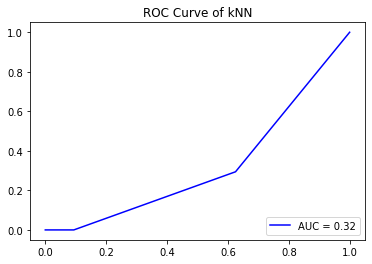

In [ ]:
y_pred=knn.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')


plt.title('ROC Curve of kNN')
plt.show()